In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Ex2

### 2a PARTICLE PERSPECTIVE

In [2]:
class GlobalClock():
    def __init__(self, rate):
        self.rate = rate
    
    def tick(self):
        return -np.log(np.random.rand())/self.rate
    
class Particle():
    def __init__(self, start):
        self.pos = []
        self.transition_times = []

        self.pos.append(start)
        self.transition_times.append(0)

class Node():
    def __init__(self, id):
        self.id = id
        self.num_particles = 0
    

In [3]:
Lambda = [
[0, 2/5, 1/5, 0, 0],
[0, 0, 3/4, 1/4, 0],
[1/2, 0, 0, 1/3, 0],
[0, 0, 1/3, 0, 2/3],
[0, 1/3, 0, 1/3, 0]]

w = np.sum(Lambda, axis=1)
w_star = np.max(w)
# compute the off-diagonal part of Q
P_bar = Lambda/w_star 
# add the diagonal part
P_bar = P_bar + np.diag(np.ones(len(w))-np.sum(P_bar,axis=1))

# compute dominant eigenvector
values,vectors = np.linalg.eig(P_bar.T)
index = np.argmax(values.real)
pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar)
print("pi_bar=", pi_bar)

nstates = len(pi_bar)

pi_bar= [0.2173913  0.14906832 0.26086957 0.1863354  0.1863354 ]


In [4]:
particles = [Particle(2) for _ in range(100)]
node_ids = [0,1,2,3,4] # represent o a b c d

clock = GlobalClock(rate = 100)

In [5]:
n_steps = 100000

In [6]:
for _ in range(n_steps):
    t_next = clock.tick()

    chosen_particle_index = np.random.randint(low = 0, high = len(particles))
    chosen_particle = particles[chosen_particle_index]

    chosen_particle.pos.append(np.random.choice(node_ids, p=P_bar[chosen_particle.pos[-1],:]))
    chosen_particle.transition_times.append(chosen_particle.transition_times[-1] + t_next)

    for i in range(len(particles)):
        if i != chosen_particle_index:
            particles[i].pos.append(particles[i].pos[-1])
            particles[i].transition_times.append(particles[i].transition_times[-1] + t_next)

    

In [7]:
def avg_return_time(particle, padded_endtime, return_pos):
    intervals = np.diff(particle.transition_times, n=1, append = particle.transition_times[-1] + padded_endtime)
    pos = np.array(particle.pos)
    visits = np.argwhere(pos == return_pos).flatten()

    sum = 0
    count = 0
    temp = 0
    
    for i in range(len(visits) - 1):
        begin = visits[i]
        end = visits[i+1]

        if end >  begin + 1:
            for j in range(begin, end):
                sum = sum + intervals[j]
            sum = sum + temp
            count = count + 1

            temp = 0
        else:
            temp = temp + intervals[begin]

    return sum/count

In [8]:
padded_endtime = clock.tick()

l = []

for particle in particles:
    l.append(avg_return_time(particle, padded_endtime, 2))

In [9]:
mean = np.mean(l)
variance = np.var(l)
median = np.median(l)
first_quartile = np.quantile(l, q = 0.25)
third_quartile = np.quantile(l, q = 0.75 )

In [10]:
print(f'mean: {mean}')
print(f'variance: {variance}')
print(f'median: {median}')
print(f'Q1: {first_quartile}')
print(f'Q3: {third_quartile}')

mean: 4.5947226959616785
variance: 0.05724789777776738
median: 4.5646922244682955
Q1: 4.4484101579900255
Q3: 4.744345971880196


### 2b NODE PERSPECTIVE

In [18]:
threshold = 60

In [19]:
node_ids = [0,1,2,3,4] #represent o,a,b,c,d
nodes = [Node(id) for id in node_ids ]

nodes[0].num_particles = 100

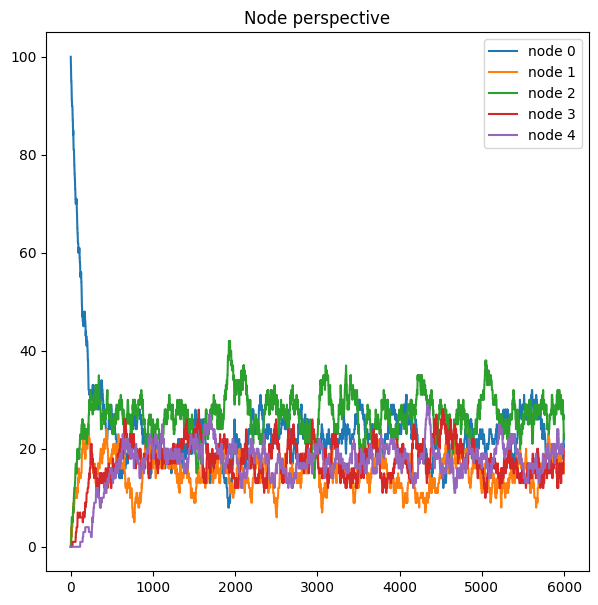

In [20]:
current_node = 0

time = clock.tick()
counter = 0
record = []

while time < threshold:
    record.append([nodes[i].num_particles for i in node_ids])

    chosen_node = np.random.choice(node_ids, p= np.array([nodes[i].num_particles for i in range(len(nodes))]) / 100)
    to_node = np.random.choice(node_ids, p=P_bar[chosen_node,:])

    nodes[chosen_node].num_particles -= 1
    nodes[to_node].num_particles +=1

    time += clock.tick()
    counter += 1

record.append([nodes[i].num_particles for i in node_ids])

record = np.array(record)

fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)

for node in node_ids:
    trajectory = record[:,node]
    x = [i for i in range(len(trajectory))]

    ax.plot(x, trajectory, label='node {0:d}'.format(node))
    
ax.legend()
ax.set_title(label = 'Node perspective')
plt.savefig('fig/node_perspective')
    

In [31]:
np.mean(record[1000:], axis = 0) / 100

array([0.21780756, 0.14932587, 0.27090218, 0.17959792, 0.18236647])

In [ ]:
#pi_bar= [0.2173913  0.14906832 0.26086957 0.1863354  0.1863354 ]